In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [38]:
rc('animation', html='html5')

In [116]:
class PiSimulator:
    
    def __init__(self):
        """
        Sets up the figure and the axes for the animation.
        """
        self.iterations = 0
        self.count = 0
        
        # create fig and axes
        self.fig, self.axs = plt.subplots(2, 1)
        self.fig.set_size_inches(8, 18)
        
        self.scat_xdata, self.scat_ydata = [], []
        self.iter_data, self.approx_data = [], []

        # Draw unit circle and set x and y axis limits
        self.setup_top()
        self.scat = self.axs[0].scatter([], [], alpha=0.7)
        
        # Plot horizontal line for value of pi in second plot
        self.setup_bottom()
        self.line, = self.axs[1].plot([], [], color='orange')

        
    def setup_top(self):
        circle = plt.Circle(xy=(0, 0), radius=1, fill=False, color='b')
        self.axs[0].add_artist(circle)
        self.axs[0].set_xlim(-1, 1)
        self.axs[0].set_ylim(-1, 1)
    
    def setup_bottom(self):
        self.axs[1].axhline(y=np.pi)
        self.axs[1].axhline(y=0, color='k')
        self.axs[1].axvline(x=0, color='k')
        self.axs[1].set_yticks([0, 1, 2, 3, 3.14, 4, 5])
        self.axs[1].set_yticklabels(['0', '', '2.0', '', '3.14', '4.0', ''])
        self.axs[1].set_xlim(-2, 1000)
        self.axs[1].set_ylim(-1, 5)
        self.axs[1].set_xlabel("Iterations", fontsize=11, labelpad=10)
    
    def calc_approx(self):
        """
        Returns the approximation of pi at current iteration: (num in circle) / (total points) * (area of square)
        """
        return (self.count / self.iterations) * 4

    def animate(self, i):
        self.iterations += 1
        rand_pt = np.random.uniform(-1, 1, size=2)
        self.scat_xdata.append(rand_pt[0])
        self.scat_ydata.append(rand_pt[1])

        self.scat.set_offsets(np.c_[self.scat_xdata, self.scat_ydata])

        if np.sum(rand_pt ** 2) <= 1:
            self.count += 1

        self.iter_data.append(self.iterations)
        self.approx_data.append(self.calc_approx())
        self.line.set_data(self.iter_data, self.approx_data)
        return (scat, line)
        
    def create_animation(self, n):
        return animation.FuncAnimation(self.fig, self.animate, frames=n, interval=50, blit=True)



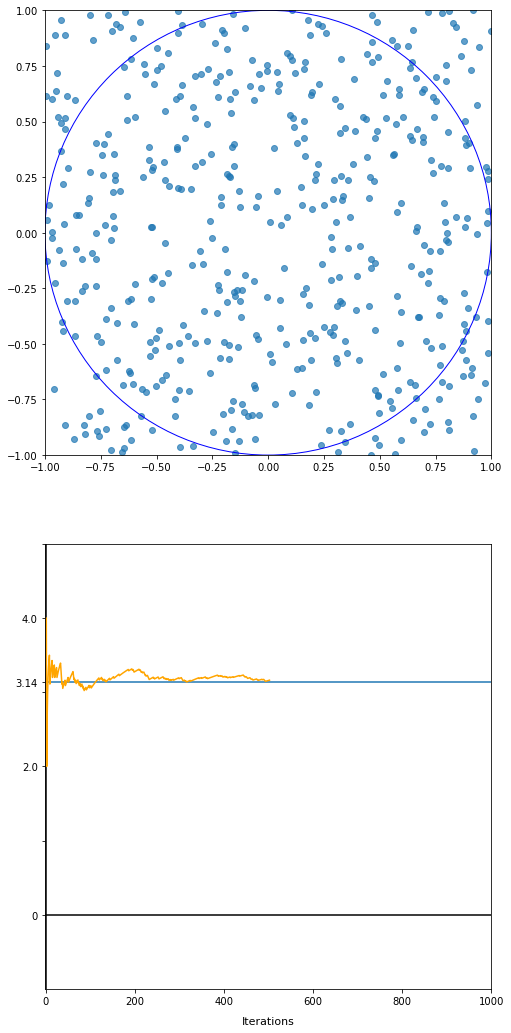

In [117]:
sim = PiSimulator()
anim = sim.create_animation(500)

display(anim)
